##Load the Libraries

In [3]:
import torch
import torch.nn as nn
from torchvision import transforms, datasets
from torch import optim as optim

##Select Device

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


##Load MNIST Dataset & Dataloader


In [5]:
batch_size = 100
# MNIST dataset
dataset = datasets.MNIST(root='./data/', train=True, transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize([0.5], [0.5])]), download=True)

# Data loader
dataloader = torch.utils.data.DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True)

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


##Size of Dataset & Dataloader

In [6]:
print(f"Length of total dataset = {len(dataset)}, \nLength of dataloader with having batch_size of {batch_size} = {len(dataloader)}")

Length of total dataset = 60000, 
Length of dataloader with having batch_size of 100 = 600


##Display Images & Labels

In [7]:
dataiter = iter(dataloader)
images,labels = dataiter.next()
print(torch.min(images),torch.max(images))

tensor(-1.) tensor(1.)


torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([1, 28, 28]) tensor(1)


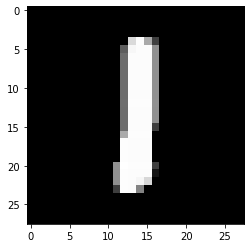

In [13]:
print(images.shape, labels.shape)
print(images[0].shape, labels[0])

import matplotlib.pyplot as plt
plt.imshow(images[10].reshape(28,28), cmap='gray')

##Generator Model

In [14]:
class GeneratorModel(nn.Module):
    def __init__(self):
        super(GeneratorModel, self).__init__()
        input_dim = 100
        output_dim = 784

        self.hidden_layer1 = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.LeakyReLU(0.2)
        )

        self.hidden_layer2 = nn.Sequential(
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2)
        )

        self.hidden_layer3 = nn.Sequential(
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2)
        )

        self.hidden_layer4 = nn.Sequential(
            nn.Linear(1024, output_dim),
            nn.Tanh()
        )
    
    def forward(self, x):
        output = self.hidden_layer1(x)
        output = self.hidden_layer2(output)
        output = self.hidden_layer3(output)
        output = self.hidden_layer4(output)
        return output.to(device)


##Discriminator Model

In [15]:
class DiscriminatorModel(nn.Module):
    def __init__(self):
        super(DiscriminatorModel, self).__init__()
        input_dim = 784
        output_dim = 1

        self.hidden_layer1 = nn.Sequential(
            nn.Linear(input_dim, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )

        self.hidden_layer2 = nn.Sequential(
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )

        self.hidden_layer3 = nn.Sequential(
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )

        self.hidden_layer4 = nn.Sequential(
            nn.Linear(256, output_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        output = self.hidden_layer1(x)
        output = self.hidden_layer2(output)
        output = self.hidden_layer3(output)
        output = self.hidden_layer4(output)

        return output.to(device)


##Model Architecture

In [16]:
discriminator = DiscriminatorModel()
generator = GeneratorModel()
discriminator.to(device)
generator.to(device)
print(generator,"\n\n\n",discriminator)

GeneratorModel(
  (hidden_layer1): Sequential(
    (0): Linear(in_features=100, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
  )
  (hidden_layer2): Sequential(
    (0): Linear(in_features=256, out_features=512, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
  )
  (hidden_layer3): Sequential(
    (0): Linear(in_features=512, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
  )
  (hidden_layer4): Sequential(
    (0): Linear(in_features=1024, out_features=784, bias=True)
    (1): Tanh()
  )
) 


 DiscriminatorModel(
  (hidden_layer1): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
  )
  (hidden_layer2): Sequential(
    (0): Linear(in_features=1024, out_features=512, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
  )
  (hidden_layer3): Sequential(
    (0): Linear(in_features=512, out_features=256, b

##Model Summary

In [17]:
from torchsummary import summary
summary(generator,(784,100))
summary(discriminator,(1,784))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1             [-1, 784, 256]          25,856
         LeakyReLU-2             [-1, 784, 256]               0
            Linear-3             [-1, 784, 512]         131,584
         LeakyReLU-4             [-1, 784, 512]               0
            Linear-5            [-1, 784, 1024]         525,312
         LeakyReLU-6            [-1, 784, 1024]               0
            Linear-7             [-1, 784, 784]         803,600
              Tanh-8             [-1, 784, 784]               0
Total params: 1,486,352
Trainable params: 1,486,352
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.30
Forward/backward pass size (MB): 30.82
Params size (MB): 5.67
Estimated Total Size (MB): 36.79
----------------------------------------------------------------
------------------------------------

##Loss & Optimizer

In [18]:
criterion = nn.BCELoss()
d_optimizer = torch.optim.Adam(discriminator.parameters(), lr=0.0002)
g_optimizer = torch.optim.Adam(generator.parameters(), lr=0.0002)

##Training Loop

Epochs [1/100] & Batch [600/600]: loss_d: 0.6744, loss_g: 0.8492, real_score: 0.5223, fake_score: 0.4435, took time: 11s
Training Steps Completed:  599
Real Images


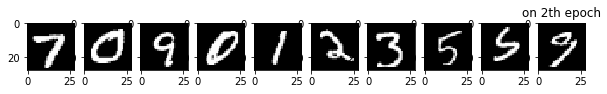

Generated Images


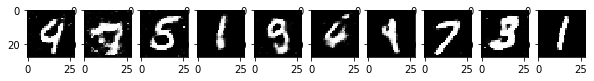

Epochs [2/100] & Batch [600/600]: loss_d: 0.6252, loss_g: 0.9750, real_score: 0.5465, fake_score: 0.3963, took time: 12s


KeyboardInterrupt: ignored

In [27]:
import time
num_epochs = 100
batch = 100
outputs=[]

# Losses & scores
losses_g = []
losses_d = []
real_scores = []
fake_scores = []

for epoch_idx in range(num_epochs):
    start_time = time.time()
    for batch_idx, data_input in enumerate(dataloader):
      
        real = data_input[0].view(batch, 784).to(device) # batch_size X 784
        batch_size = data_input[1] # batch_size

        noise = torch.randn(batch,100).to(device)
        fake = generator(noise) # batch_size X 784

        disc_real = discriminator(real).view(-1)
        lossD_real = criterion(disc_real, torch.ones_like(disc_real))

        disc_fake = discriminator(fake).view(-1)
        lossD_fake = criterion(disc_fake, torch.zeros_like(disc_fake))

        lossD = (lossD_real + lossD_fake) / 2
        real_score = torch.mean(disc_real).item()
        fake_score = torch.mean(disc_fake).item()
        
        d_optimizer.zero_grad()      
        lossD.backward(retain_graph=True)
        d_optimizer.step()        
        
        gen_fake = discriminator(fake).view(-1)
        lossG = criterion(gen_fake, torch.ones_like(gen_fake))
        
        g_optimizer.zero_grad()
        lossG.backward()
        g_optimizer.step()
        
        if ((batch_idx + 1)% 600 == 0 and (epoch_idx + 1)%10 == 0):
            print("Training Steps Completed: ", batch_idx)
            
            with torch.no_grad():
                generated_data = fake.cpu().view(batch, 28, 28)
                real_data = real.cpu().view(batch, 28, 28)
                i = 0
                j = 0
                plt.figure(figsize=(10,2))
                print("Real Images")
                for x in real_data:
                    if(i>=10): break
                    plt.subplot(2,10,i+1)
                    plt.imshow(x.detach().numpy(), interpolation='nearest',cmap='gray')
                    i = i+1
                plt.title("on "+str((epoch_idx + 1))+ "th epoch")
                plt.show()

                print("Generated Images")
                plt.figure(figsize=(10,2))
                for x in generated_data:
                    if(j>=10): break
                    plt.subplot(2,10,j+1)
                    plt.imshow(x.detach().numpy(), interpolation='nearest',cmap='gray')
                    j = j+1
                plt.show()

    outputs.append((epoch_idx,real,fake))
    losses_g.append(lossG)
    losses_d.append(lossD)
    real_scores.append(real_score)
    fake_scores.append(fake_score)

    print('Epochs [{}/{}] & Batch [{}/{}]: loss_d: {:.4f}, loss_g: {:.4f}, real_score: {:.4f}, fake_score: {:.4f}, took time: {:.0f}s'.format(
            (epoch_idx+1), num_epochs, batch_idx+1, len(dataloader),lossD,lossG,real_score,fake_score,time.time()-start_time))


##Loss Plot

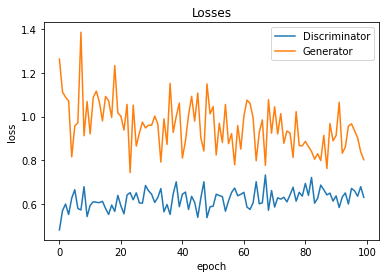

In [22]:
plt.plot(losses_d, '-')
plt.plot(losses_g, '-')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Discriminator', 'Generator'])
plt.title('Losses');

##Score Plot

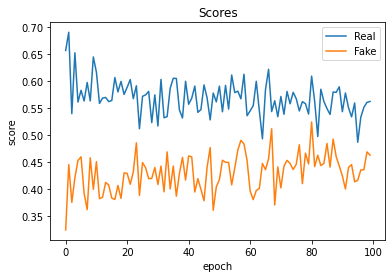

In [23]:
plt.plot(real_scores, '-')
plt.plot(fake_scores, '-')
plt.xlabel('epoch')
plt.ylabel('score')
plt.legend(['Real', 'Fake'])
plt.title('Scores');

##Saving Trained Models

In [24]:
# Save trained models
torch.save(generator.state_dict(), 'generator.pth')
torch.save(discriminator.state_dict(), 'discriminator.pth')
